In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from numpy.linalg import inv
from numpy.linalg import norm
from numpy.typing import NDArray

# Prelab

Centered Difference 

$f'(s) \approx \frac{f(s+h)-f(s-h)}{2h}$

Forward Difference

$f'(s) \approx \frac{f(s+h)-f(s)}{h}$


$f(x) = \cos(x)$ at x= $\frac{\pi}{2}$

In [2]:
def f(x): return np.cos(x)


n = np.arange(0, 10)
def h(x): return 0.01 * (2.0 ** (-1*x))

In [3]:
forward_diff = (f(np.pi/2 + h(n)) - f(np.pi/2)) / h(n)
center_diff = (f(np.pi/2 + h(n)) - f(np.pi/2 - h(n)))/(2 * h(n))

print(forward_diff)
print(center_diff)

[-0.99998333 -0.99999583 -0.99999896 -0.99999974 -0.99999993 -0.99999998
 -1.         -1.         -1.         -1.        ]
[-0.99998333 -0.99999583 -0.99999896 -0.99999974 -0.99999993 -0.99999998
 -1.         -1.         -1.         -1.        ]


## Find Order of convergence 

$f(x) = \cos(x)$ at $x= \frac{\pi}{2}$ -> $ f'(\frac{\pi}{2}) = -1$

 In a plot of $\ln\bigl|\,x_{k+1} - \alpha\,\bigr|$ against $\ln\bigl|\,x_{k} - \alpha\,\bigr|$, the slope is $p$, which is the order of convergence.

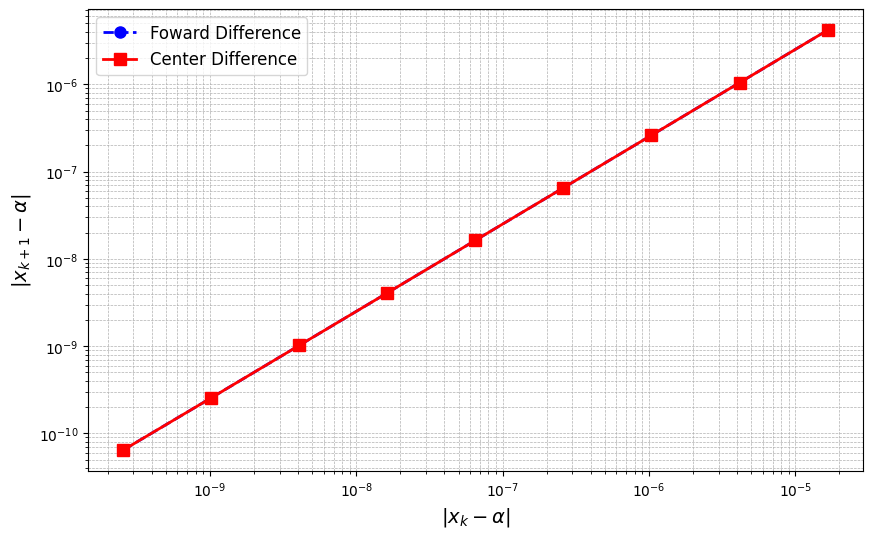

In [4]:
f_prime = [-1]*10

forward_error = abs(np.subtract(forward_diff, f_prime))
center_error = abs(np.subtract(center_diff, f_prime))

x_foward = forward_error[:-1]
y_foward = forward_error[1:]

x_center = center_error[:-1]
y_center = center_error[1:]


plt.figure(figsize=(10, 6))

plt.loglog(x_foward, y_foward, 'bo--', markersize=8,
           linewidth=2, label="Foward Difference")

plt.loglog(x_center, y_center, 'rs-', markersize=8,
           linewidth=2, label="Center Difference")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel(r'$|x_k - \alpha|$', fontsize=14)
plt.ylabel(r'$|x_{k+1} - \alpha|$', fontsize=14)
plt.legend(fontsize=12)

plt.show()

# 3.2  Build Slacker Newton

### 3.2.1 Update condition:

Standard Newton Update:
$x_{k+1} = x_k - J^{-1}(x_k)F(x_k)$

Slacker Update:
$\lVert x_{k+1} - x_{k} \rVert$ > $\lVert x_{k} - x_{k-1} \rVert$

If error between iterations increases, then reupdate the Jacobian

### 3.2.2 Implement Slacker Newton

In [5]:
def SlackerNewton(evalF, evalJ, x0, tol, Nmax):
    ''' Slacker Newton = if iteration error increases, repudate the Jacobian'''

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    J = evalJ(x0)
    Jinv = inv(J)
    prev_error = float('-inf')
    for its in range(Nmax):

        F = evalF(x0)
        x1 = x0 - Jinv.dot(F)

        if (norm(x1-x0) < tol):
            xstar = x1
            ier = 0
            return [xstar, ier, its]

        if (norm(x1 - x0) > prev_error):
            J = evalJ(x1)
            Jinv = inv(J)

        prev_error = norm(x1-x0)
        x0 = x1

    xstar = x1
    ier = 1
    return [xstar, ier, its]

### 3.2.3 Apply Slacker, Compare to Lazy

In [6]:
def LazyNewton(evalF,evalJ,x0,tol,Nmax):

    ''' Lazy Newton = use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    J = evalJ(x0)
    Jinv = inv(J)
    for its in range(Nmax):

       F = evalF(x0)
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier,its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]  

In [7]:
def evalF(x: NDArray[np.float64]) -> NDArray[np.float64]: 
    x1, x2 = x #2d x array
    f1 = 4*x1**2 + x2**2 -4
    f2 = x1 + x2 - np.sin(x1-x2)

    return np.array([f1,f2], dtype=float)


def evalJ(x: NDArray[np.float64]) -> NDArray[np.float64]: 
    x1, x2 = x #2d x array
    j11 = 8*x1
    j12 = 2*x2
    j21 = 1- np.cos(x1-x2)
    j22 = 1 +np.cos(x1-x2)
    return np.array([[j11, j12], [j21, j22]], dtype=float)



In [8]:
evalF(np.array([1, 0]))

array([0.        , 0.15852902])

In [9]:
Nmax = 100
tol = 1e-10

print(SlackerNewton(evalF, evalJ, np.array([1,0]), tol, Nmax))

print(LazyNewton(evalF, evalJ, np.array([1,0]), tol, Nmax))


[array([ 0.99860694, -0.10553049]), 0, 4]
[array([ 0.99860694, -0.10553049]), 0, 7]


Slacker Newton is converged faster than Lazy Newton

### 3.2.4 
Me and my lab partner had similar convergences

### 3.2.5 Compare to Example Problem

In [10]:
from newtonNONLinear2 import evalF as exampleF, evalJ as exampleJ

In [11]:
x0 = np.array([0.1, 0.1, -0.1])


print(SlackerNewton(evalF=exampleF, evalJ=exampleJ, x0=x0, tol = tol, Nmax=Nmax))
print(LazyNewton(evalF=exampleF, evalJ=exampleJ, x0=x0 ,tol = tol, Nmax=Nmax))



[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 8]
[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 22]


Slacker newton converged faster than lazy Newton

# 3.3 Newton with approximate Jacobians

### 3.3.1 Implment Finite Difference

Used Cenetered Difference

In [57]:
def approx_jac(evalF,
               x,
               h):
    f0 = evalF(x)
    m = f0.size   # Number of functions (rows)
    n = x.size    # Number of variables (columns)
    J = np.zeros((m, n), dtype=float)

    if np.isscalar(h):
        h = np.full(x.shape, h)
    for j in range(n):
        dx = np.zeros_like(x)
        dx[j] = h[j]  # Perturb only the j-th component

        f_plus = evalF(x + dx)
        f_minus = evalF(x - dx)

        # Populate the j-th column with the centered difference approximation.
        J[:, j] = (f_plus - f_minus) / (2 * h[j])

    return J

### 3.3.2 Apply Finite Differnce

Use $h_j = (10^{-7}) |x_j|$ and $h_j = (10^{-3}) |x_j|$

In [58]:
def NewtonFinite(evalF,x0,tol,Nmax, h):

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    for its in range(Nmax):
       J = approx_jac(evalF, x0, h*norm(x0))
       Jinv = inv(J)
       F = evalF(x0)
       
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]

def SlackerNewtonFinite(evalF, x0, tol, Nmax, h):
    ''' Slacker Newton = if iteration error increases, repudate the Jacobian'''

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    J = approx_jac(evalF, x0, h*norm(x0))
    Jinv = inv(J)
    prev_error = float('-inf')
    for its in range(Nmax):

        F = evalF(x0)
        x1 = x0 - Jinv.dot(F)

        if (norm(x1-x0) < tol):
            xstar = x1
            ier = 0
            return [xstar, ier, its]

        if (norm(x1 - x0) > prev_error):
            J = approx_jac(evalF, x1, h*norm(x1))
            Jinv = inv(J)

        prev_error = norm(x1-x0)
        x0 = x1

    xstar = x1
    ier = 1
    return [xstar, ier, its]


def LazyNewtonFinite(evalF,x0,tol,Nmax,h):

    ''' Lazy Newton = use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    J = approx_jac(evalF, x0, h*norm(x0))
    Jinv = inv(J)
    for its in range(Nmax):

       F = evalF(x0)
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier,its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]  


In [59]:
#h=1*10^{-7}

print(NewtonFinite(evalF, np.array([1,0.0001]), 1e-10, 1000, 1e-7))
print(SlackerNewtonFinite(evalF, np.array([1,0.0001]), 1e-10, 1000, 1e-7))
print(LazyNewtonFinite(evalF, np.array([1,0.0001]), 1e-10, 1000, 1e-7))

[array([ 0.99860694, -0.10553049]), 0, 3]
[array([ 0.99860694, -0.10553049]), 0, 4]
[array([ 0.99860694, -0.10553049]), 0, 7]


In [60]:
#h=1*10^{-3}
print(NewtonFinite(evalF, np.array([1,0.0001]), 1e-10, 1000, 1e-3))
print(SlackerNewtonFinite(evalF, np.array([1,0.0001]), 1e-10, 1000, 1e-3))
print(LazyNewtonFinite(evalF, np.array([1,0.0001]), 1e-10, 1000, 1e-3))

[array([ 0.99860694, -0.10553049]), 0, 3]
[array([ 0.99860694, -0.10553049]), 0, 4]
[array([ 0.99860694, -0.10553049]), 0, 7]


There did not appear to be any performance dependece on $h_j$

### 3.3.3 example problem

In [61]:
#exampleF imported above

init = np.array([0.1, 0.1, -0.1])

print(NewtonFinite(exampleF, init, 1e-10, 1000, 1e-3))
print(SlackerNewtonFinite(exampleF, init, 1e-10, 1000, 1e-3))
print(LazyNewtonFinite(exampleF, init, 1e-10, 1000, 1e-3))

[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 5]
[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 11]
[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 23]


In [62]:

print(SlackerNewton(evalF=exampleF, evalJ=exampleJ, x0=x0, tol = tol, Nmax=Nmax))
print(LazyNewton(evalF=exampleF, evalJ=exampleJ, x0=x0 ,tol = tol, Nmax=Nmax))


[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 8]
[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 22]


Number of iterations till convergence imporved when using finite difference

# 3.4 Hybrid Newton

In [63]:
def ModifiedSlackerNewtonFinite(evalF, x0, tol, Nmax, c):
    ''' Slacker Newton = if iteration error increases, repudate the Jacobian'''

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''
    h_vec = c*np.abs(x0)
    J = approx_jac(evalF, x0, h_vec)
    Jinv = inv(J)
    prev_error = float('-inf')
    for its in range(Nmax):

        F = evalF(x0)
        x1 = x0 - Jinv.dot(F)

        if (norm(x1-x0) < tol):
            xstar = x1
            ier = 0
            return [xstar, ier, its]

        if (norm(x1 - x0) > prev_error):
            c=c/2.0
            h_vec = c*np.abs(x1)
            J = approx_jac(evalF, x1, h_vec)
            Jinv = inv(J)

        prev_error = norm(x1-x0)
        x0 = x1

    xstar = x1
    ier = 1
    return [xstar, ier, its]

In [64]:
print(SlackerNewton(evalF=exampleF, evalJ=exampleJ, x0=x0, tol = tol, Nmax=Nmax))
print(SlackerNewtonFinite(exampleF, init, 1e-10, 1000, 1e-3))
print(ModifiedSlackerNewtonFinite(exampleF, init, 1e-10, 1000, 1e-3))


[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 8]
[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 11]
[array([ 0.49999052,  0.01441216, -0.52323977]), 0, 11]


The modified Slacker Newton with evaluation of $h_j$ cut in half converged in the same amount of iterations as the finite differnece approximation